# Marketing Analytics of iFoodBrain

In this project, we are trying to analyze the marketing data for a company iFoodBrain and propose data-driven insights to improve their reveneu.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap 
from sklearn import metrics

In [2]:
data = pd.read_csv('./Data/ifood_df.csv')

## Understanding the Data

In [3]:
data.shape

(2205, 39)

The Data consists of 2205 customer records, each with 39 features. The following specifies the details regarding the features as defined by the dataset. 

| Features  | Description  |
|---|---|
| Income | Customer's yearly household income. |
| Kidhome | No. of small children in home. |
| Teenhome | No. of teens in home. |
| Recency | No. of days since last purchase. |
| MntWines | Amount spent on Wines in the last two years. |
| MntFruits | Amount spent on Fruits in the last two years. |
| MntMeatProducts | Amount spent on Meat Products in the last two years. |
| MntFishProducts | Amount spent on Fish in the last two years.  |
| MntSweetProducts | Amount spent on Sweet Products in the last two years.  |
| MntGoldProds | Amount spent on Gold Class Products in the last two years.  |
| NumDealsPurchases | No. of purchases made with discount. |
| NumWebPurchases | No. of purchases made through Company's website. |
| NumCatalogPurchases | No. of purchases made using Catalogue.  |
| NumStorePurchases | No. of purchases made directly through store.  |
| NumWebVisitsMonth | No. of visits to the company website. |
| AcceptedCmp3 | 1 if customer accepted the offer in Third Campaign, 0 otherwise  |
| AcceptedCmp4 | 1 if customer accepted the offer in Fourth Campaign, 0 otherwise  |
| AcceptedCmp5 | 1 if customer accepted the offer in Fifth Campaign, 0 otherwise  |
| AcceptedCmp1 | 1 if customer accepted the offer in First Campaign, 0 otherwise |
| AcceptedCmp2 | 1 if customer accepted the offer in Second Campaign, 0 otherwise  |
| Complain | 1 if Customer complained in the last two years. |
| Z_CostContact | Not defined by the Dataset.  |
| Z_Revenue | Not defined by the Dataset. |
| Response | 1 if customer accepted the offer in the last Campaign, 0 otherwise  |
| Age | Age of Customer. |
| Customer_Days | No. of Days since Customer. |
| marital_Divorced | 1 if Customer is divorced, 0 otherwise. |
| marital_Married | 1 if Customer is Married, 0 otherwise.  |
| marital_Single | 1 if Customer is Single, 0 otherwise.  |
| marital_Together | 1 if Customer is Living Together, 0 otherwise. |
| marital_Widow | 1 if Customer is Widowed, 0 otherwise.  |
| education_2n Cycle | 1 if Customer has highest qualification till 2n Cycle.  |
| education_Basic | 1 if Customer has highest qualification till High School.   |
| education_Graduation | 1 if Customer has highest qualification till Graduation.  |
| education_Master | 1 if Customer has highest qualification till Masters.  |
| education_PhD | 1 if Customer has highest qualification till PhD. |
| MntTotal | Total Amount spent in the last two years. |
| MntRegularProds | Amount spent on Regular class Products in the last two years. |
| AcceptedCmpOverall | Total number of Campaigns accepted by the Customer  |

### Which Features to Drop?

* `Z_CostContact` and `Z_Revenue` are not defined by the Dataset and hence, sadly, we have to drop them. :(
* Since we have no idea when the campaigns were organized and our analysis is mostly relative than absolute hence, no of days since last purchase does not play an important role in our current analysis. Thus, we can drop `Recency`. 

In [4]:
if 'Z_CostContact' in data.columns:
    data.drop(columns =['Z_CostContact', 'Z_Revenue', 'Recency'], axis =1, inplace=True)

## Data Cleaning

### Determining Outliers

<AxesSubplot:>

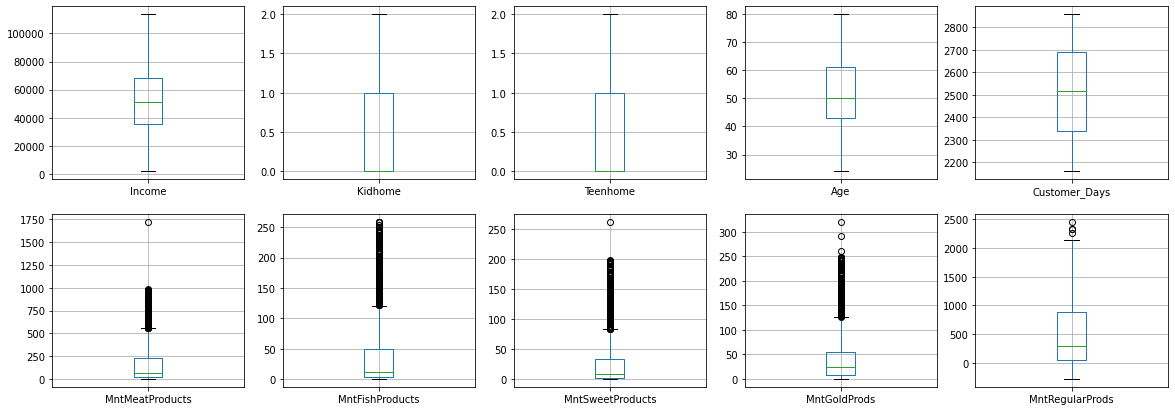

In [5]:
plt.figure(figsize = (20,7))
plt.subplot(2,5,1)
data.boxplot(column = 'Income')
plt.subplot(2,5,2)
data.boxplot(column = 'Kidhome')
plt.subplot(2,5,3)
data.boxplot(column = 'Teenhome')
plt.subplot(2,5,4)
data.boxplot(column = 'Age')
plt.subplot(2,5,5)
data.boxplot(column = 'Customer_Days')
plt.subplot(2,5,6)
data.boxplot(column = 'MntMeatProducts')
plt.subplot(2,5,7)
data.boxplot(column = 'MntFishProducts')
plt.subplot(2,5,8)
data.boxplot(column = 'MntSweetProducts')
plt.subplot(2,5,9)
data.boxplot(column = 'MntGoldProds')
plt.subplot(2,5,10)
data.boxplot(column = 'MntRegularProds')

### Missing Value Imputation

In [7]:
data.isna().sum().sum()

0

### Summary

The outliers found in `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds` and `MntRegularProds` are within rational range. Hence, there is no point in removing them. Other columns do not have any significant outliers. 
There are no missing values in any of the features. Hence, the dataset is well-defined and quite clean.

## Feature Management

The columns in the dataset are haphazard and hence we can order it in different segments as per basics of Marketing Analytics for simplier understanding. 

| Segment  | Meaning  |Columns  |
|---|---|---|
| Demographic | Classification based on individual attributes| Income, Age, Kidhome, Teenhome, marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD |
| Firmographic | Classification based on company or organisation attributes| AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, AcceptedCmpOverall, Complain |
| Behavioural | Classification based on behaviours like product usage, technology laggards, etc.| MntWines, MntSweetProducts, MntFruits, MntMeatProducts, MntFishProducts, MntGoldProds, MntRegularProds, MntTotal, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Customer_Days |

In [8]:
data = data[['Income', 'Age', 'Kidhome', 'Teenhome',  'marital_Single', 'marital_Divorced', 'marital_Widow', 'marital_Together', 'marital_Married',  
'education_Basic', 'education_Graduation', 'education_Master', 'education_2n Cycle', 'education_PhD', 'Complain', 'AcceptedCmp1',
 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response', 'AcceptedCmpOverall', 'MntWines', 'MntSweetProducts', 'MntFruits', 
 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntRegularProds', 'MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 
 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_Days' ]] 

In [9]:
data.to_csv('./Data/cleaned-data.csv', index = False)
del data

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('./Data/cleaned-data.csv')
correlation = df.corr()

### Demographic Vs Behavioural relationship

#### Analysis using Basic Demographics

Text(0.5, 1.0, 'Basic Demographics Vs Behavioural relationship')

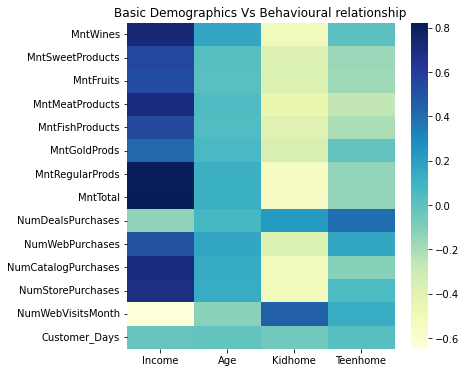

In [8]:
startx = correlation.columns.get_loc('Income')
endx = correlation.columns.get_loc('Teenhome') +1

starty = correlation.columns.get_loc('MntWines')
endy = correlation.columns.get_loc('Customer_Days') + 1

plt.figure(figsize=(6,6))
sns.heatmap(correlation.iloc[starty:endy, startx:endx], cmap="YlGnBu")
plt.title('Basic Demographics Vs Behavioural relationship')

**Inferences**

1. Higher Income group
   1. Does not prefer to visit the Website
   2. Prefers Store and Catalog purchases
   3. Does not show much interest for Deals.
   4. Likes Regular Products more than Gold Products. (Interesting!)
   5. Have high expenditures in all categories, prominently in Wines and Meat Products.
   6. Have a moderate brand loyalty.

2. Higher Age group
   1. Rarely visits the company websites.
   2. Are averagely interested in particulars the company offers.
   3. Spends on Wine in moderation.
   4. Have a moderate brand loyalty.

3. Customers with Kids at home
   1. Often visits the Company website but has low Web purchases.
   2. Keenly interested on Deals.
   3. Does not showcase brand loyalty. (Interesting!)

4. Customers with Teens at home
   1. Have a fairly average distribution
   2. Interested on Deals
   3. Showcase a better brand loyalty.

**Note:** The `Customer_Days` is quite uniformly distributed between the demographics of the Segment. This can be seen as a good distribution of the Memberships without prioritizing any single sector.  

#### Demographic vs Firmographic Relation

Text(0.5, 1.0, 'Demographic vs Firmographic Relation')

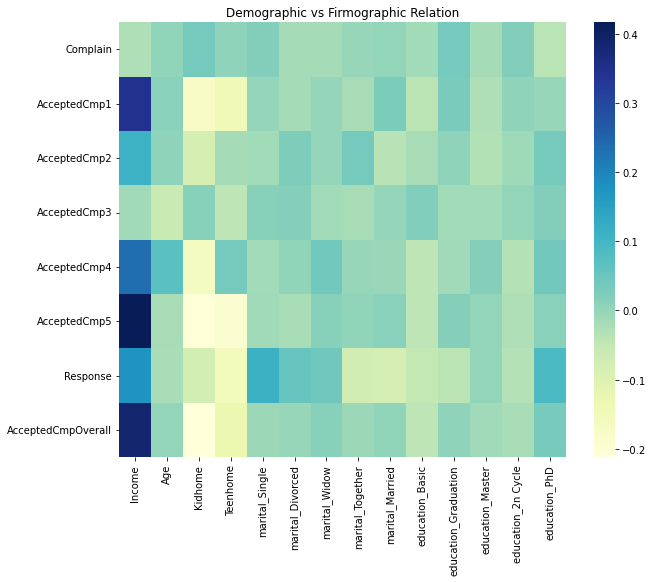

In [80]:
startx = correlation.columns.get_loc('Income')
endx = correlation.columns.get_loc('education_PhD') +1

starty = correlation.columns.get_loc('Complain')
endy = correlation.columns.get_loc('AcceptedCmpOverall') + 1

plt.figure(figsize=(10,8))
sns.heatmap(correlation.iloc[starty:endy, startx:endx], cmap="YlGnBu")
plt.title('Demographic vs Firmographic Relation')

##### Inferences

1. Campaign 1: Had quite a positive response from High income group but failed to attract Customers with Kids and Teens at home.
2. Campaign 2: Had a lower impact on Higher Income group compared to Campaign 1 but performed relatively well in other demographics.
3. Campaign 3: Had relatively bad performance compared to other Campaigns but surprisingly it had the best response from customers with Kids at home.
4. Campaign 4: Good response from higher income and age groups, best response from Customers with Teens at home but not liked by people with Kids at home.
5. Campaign 5: Focused essentially on the Higher income group. Failed miserable to attract customers with Kids and Teens.
6. Last Campaign: Higher income group has been moderately targeted. Also good response from Singles and PhDs.

**Notes:** As an Overall, we can see that the campigns were mostly targeted towards the higher income group. Customers with Kids and Teens were almost left out.

Another Interesting thing to note that the `Complain` is quite low and uniformly distributed among the demographics. Thus, the Complaint Redressal team has done quite a good job.

## Statistical Analysis

### How does our average customer looks like?

In [77]:
cols = {c: i for i, c in enumerate(df.columns)}
customer = df.mean(axis=0)
customer['Age']
print('Age:\t\t{}\tIncome:\t\t{}'.format(customer['Age'], customer['Income']))
print('\nProducts Purchased:', customer['MntWines':'MntFishProducts'], sep='\n')
print('\nCampaign Response:', customer['AcceptedCmp1': 'Response'], sep='\n')

Age:		51.09569160997732	Income:		51622.0947845805

Products Purchased:
MntWines            306.164626
MntSweetProducts     27.128345
MntFruits            26.403175
MntMeatProducts     165.312018
MntFishProducts      37.756463
dtype: float64

Campaign Response:
AcceptedCmp1    0.064399
AcceptedCmp2    0.013605
AcceptedCmp3    0.073923
AcceptedCmp4    0.074376
AcceptedCmp5    0.073016
Response        0.151020
dtype: float64


Hence, our average customer is a 51 years old with an annual salary of $51622.09. He spends an average of $562 on products with the highest expenditure on Wines ($306.16) followed by Meat Products ($165.31). He had no positive response to any of the campaigns organised and pays no interest to the Gold range of products. 

### What is the most crucial product?

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

def Model(X, Y, title):
    # Develop the Model
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 
    rg = RandomForestRegressor(n_estimators=9, n_jobs=-1)
    rg.fit(X_train, Y_train)

    y_pred = rg.predict(X_test)
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

    # Showcase the contribution of each feature    
    importances = rg.feature_importances_
    plt.figure(figsize = (10,5))
    values = np.around(importances*100, 1)
    plt.bar(X.columns, values)
    for i in range(X.shape[1]):
        plt.text(i, values[i] + 1, str(values[i]) + '%')
    plt.ylabel(title)
    plt.show()

    # Plot shap analysis to exhibit correlation
    explainer = shap.TreeExplainer(rg)
    shap_values = explainer.shap_values(X_test)
    shap.initjs()
    plt.figure(figsize = (6,6))
    shap.summary_plot(shap_values, X_test)
    plt.show()
    return rg

Root Mean Squared Error: 45.7854457022751


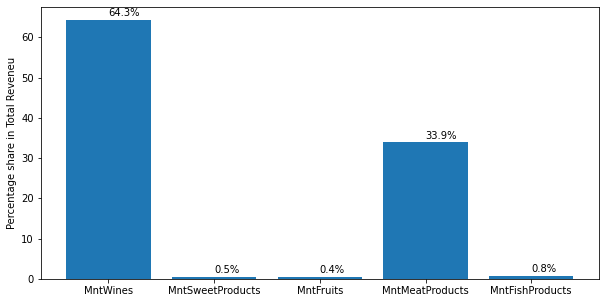

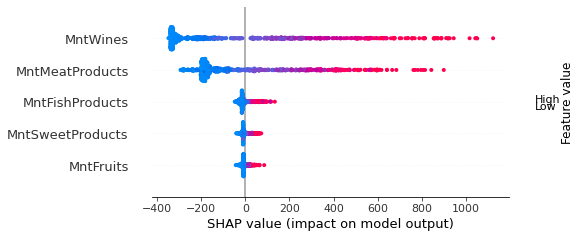

In [70]:
X = df.loc[:,'MntWines':'MntFishProducts']
Y = df.loc[:, 'MntTotal']
model = Model(X,Y, 'Percentage share in Total Reveneu')

Hence, as we can see here, Wine and Meat Products are the two most popular product categories generating 64.3% and 33.9% of the reveneue respectively. So now, let us try to learn more about our customer interested in these categories of Products.